In [1]:
import pandas as pd
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
import pickle
from nltk.tokenize import word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
%matplotlib inline

In [2]:
with open('data/cleaned_df.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [3]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [4]:
df.head()

,song_owner,song_title,song_element,verse,artist
0,Childish Gambino,This Is America,[Bridge: Childish Gambino & Young Thug],"We just wanna party, Party just for you, We ju...",Childish Gambino
1,Childish Gambino,This Is America,[Chorus: Childish Gambino],"This is America, Don't catch you slippin' now,...",Childish Gambino
2,Childish Gambino,This Is America,"[Verse 1: Childish Gambino, Blocboy JB, Slim J...","This is America (skrrt, skrrt, woo), Don't cat...",Childish Gambino
3,Childish Gambino,This Is America,[Refrain: Choir & Childish Gambino],"Ooh-ooh-ooh-ooh-ooh, tell somebody, You go tel...",Childish Gambino
4,Childish Gambino,This Is America,"[Chorus: Childish Gambino, Slim Jxmmi & Young ...","This is America (woo, ayy), Don't catch you sl...",Childish Gambino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 5 columns):
song_owner      6304 non-null object
song_title      6304 non-null object
song_element    6304 non-null object
verse           6304 non-null object
artist          6304 non-null object
dtypes: object(5)
memory usage: 246.3+ KB


In [6]:
model_df = df.copy()

In [7]:
model_df['rapper'] = 0

In [8]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,rapper
0,Childish Gambino,This Is America,[Bridge: Childish Gambino & Young Thug],"We just wanna party, Party just for you, We ju...",Childish Gambino,0
1,Childish Gambino,This Is America,[Chorus: Childish Gambino],"This is America, Don't catch you slippin' now,...",Childish Gambino,0
2,Childish Gambino,This Is America,"[Verse 1: Childish Gambino, Blocboy JB, Slim J...","This is America (skrrt, skrrt, woo), Don't cat...",Childish Gambino,0
3,Childish Gambino,This Is America,[Refrain: Choir & Childish Gambino],"Ooh-ooh-ooh-ooh-ooh, tell somebody, You go tel...",Childish Gambino,0
4,Childish Gambino,This Is America,"[Chorus: Childish Gambino, Slim Jxmmi & Young ...","This is America (woo, ayy), Don't catch you sl...",Childish Gambino,0


In [9]:
model_df.loc[model_df["artist"] == 'Childish Gambino', "rapper"] = 1
model_df.loc[model_df["artist"] == 'Chance the Rapper', "rapper"] = 2
model_df.loc[model_df["artist"] == 'Drake', "rapper"] = 3
model_df.loc[model_df["artist"] == 'Kendrick Lamar', "rapper"] = 4
model_df.loc[model_df["artist"] == 'Kanye West', "rapper"] = 5

In [10]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,rapper
0,Childish Gambino,This Is America,[Bridge: Childish Gambino & Young Thug],"We just wanna party, Party just for you, We ju...",Childish Gambino,1
1,Childish Gambino,This Is America,[Chorus: Childish Gambino],"This is America, Don't catch you slippin' now,...",Childish Gambino,1
2,Childish Gambino,This Is America,"[Verse 1: Childish Gambino, Blocboy JB, Slim J...","This is America (skrrt, skrrt, woo), Don't cat...",Childish Gambino,1
3,Childish Gambino,This Is America,[Refrain: Choir & Childish Gambino],"Ooh-ooh-ooh-ooh-ooh, tell somebody, You go tel...",Childish Gambino,1
4,Childish Gambino,This Is America,"[Chorus: Childish Gambino, Slim Jxmmi & Young ...","This is America (woo, ayy), Don't catch you sl...",Childish Gambino,1


In [11]:
artist_name = ['Childish Gambino', 'Chance the Rapper', 'Drake', 'Kendrick Lamar', 'Kanye West']

In [12]:
print(list(df.verse.values)[0:10])

["We just wanna party, Party just for you, We just want the money, Money just for you (yeah), I know you wanna party, Party just for free, Girl, you got me dancin' (girl, you got me dancin'), Dance and shake the frame (yeah), We just wanna party (yeah), Party just for you (yeah), We just want the money (yeah), Money just for you (you), I know you wanna party (yeah), Party just for free (yeah), Girl, you got me dancin' (girl, you got me dancin', yeah), Dance and shake the frame (ooh)", "This is America, Don't catch you slippin' now, Don't catch you slippin' now, Look what I'm whippin' now, This is America (woo), Don't catch you slippin' now, Don't catch you slippin' now, Look what I'm whippin' now", "This is America (skrrt, skrrt, woo), Don't catch you slippin' now (ayy), Look how I'm livin' now, Police be trippin' now (woo), Yeah, this is America (woo, ayy), Guns in my area (word, my area), I got the strap (ayy, ayy), I gotta carry 'em, Yeah, yeah, I'ma go into this (ugh), Yeah, yeah, 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["yeah", "like", "uh", "huh", "aw", "oh", "la", "ayy", "okay",
                                               "na", "hey", "nigga", "niggas", "don", "wanna", "shit", "fuck",
                                               "fuckin", "fucking", "want", "know", "ha", "just", "ay", "nah",
                                               "em", "bla", "woo", "wu", "ya", "wala", "woop", "wrarrr", "ooh",
                                               "ba", "duh", "du"])

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=my_stop_words, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words=my_stop_words, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(list(model_df.verse.values))
tfidf_data = tfidf_vectorizer.fit_transform(list(model_df.verse.values))

In [14]:
print(cv_data.shape[1])
print(cv_data)

151405
  (0, 47667)	1
  (0, 116911)	2
  (0, 30618)	2
  (0, 30654)	2
  (0, 30655)	2
  (0, 54144)	4
  (0, 50952)	4
  (0, 47821)	2
  (0, 95975)	2
  (0, 87886)	2
  (0, 87859)	2
  (0, 95992)	2
  (0, 95997)	4
  (0, 47657)	2
  (0, 116897)	2
  (0, 30566)	2
  (0, 30649)	4
  (0, 53873)	4
  (0, 50792)	4
  (0, 47789)	2
  (0, 87634)	4
  (0, 95950)	8
  (1, 146371)	1
  (1, 78492)	2
  (1, 120411)	2
  :	:
  (6302, 70273)	1
  (6302, 33434)	2
  (6302, 141583)	1
  (6302, 61303)	1
  (6302, 19718)	2
  (6302, 77092)	1
  (6302, 131205)	1
  (6302, 137897)	1
  (6303, 27261)	1
  (6303, 27230)	1
  (6303, 76980)	2
  (6303, 89155)	2
  (6303, 76967)	2
  (6303, 78979)	2
  (6303, 89129)	2
  (6303, 111964)	2
  (6303, 119379)	1
  (6303, 89105)	2
  (6303, 119366)	1
  (6303, 39975)	1
  (6303, 89144)	2
  (6303, 27177)	2
  (6303, 111952)	2
  (6303, 78963)	2
  (6303, 76912)	4


In [15]:
# lsa_tfidf DIMENSIONALITY REDUCTION ON TFIDF
# Make the other two

n_comp = 20
lsa_tfidf = TruncatedSVD(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
rapper = model_df.rapper

var = lsa_tfidf.explained_variance_ratio_

var1 = np.cumsum(np.round(lsa_tfidf.explained_variance_ratio_, decimals=4)*100)

display_topics(lsa_tfidf,tfidf_vectorizer.get_feature_names(),15)


Topic  0
got, love, ain, say, man, right, cause, let, time, tell, make, need, girl, ll, feel

Topic  1
love, love love, love baby, gave love, baby love, people love, gave, love gave, run money, stop love, lovely, love day, hurt, alright good, problems love

Topic  2
day, say, say say, south, long, way, south south, day dance, day day, dance, pray, swish, high, day long, day time

Topic  3
started, started team, started started, team, team started, day, say, watch glow, glow, watch, say say, south, day dance, dance, south south

Topic  4
glow, watch glow, watch, got, bound glow, watch bound, bound, money, day, man, bitch, ain, tell, black, pool liquor

Topic  5
good, feel, alright, glow, watch glow, watch, good good, better, make, make feel, gon alright, good time, time, day, drank

Topic  6
drank, day, faded drank, drank faded, faded, let, got, drank pass, shot drank, drank sit, stand drank, wake drank, sit drank, pour drank, head shot

Topic  7
say, drank, say say, let, glow, watch g

Text(0,0.5,'Explained Variance (Percent)')

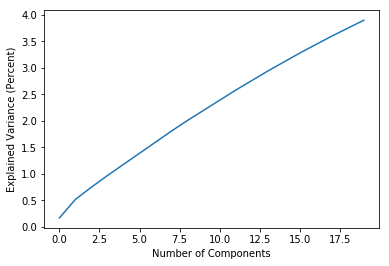

In [16]:
## FIGURE OUT HOW MANY COMPONENTS TO USE

plt.plot(var1)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance (Percent)")

In [17]:
print(lsa_tfidf_data.shape)
print(lsa_tfidf_data)

(6304, 20)
[[ 0.08342394 -0.02759254 -0.02516459 ... -0.01682208  0.09010564
  -0.03315853]
 [ 0.01871032 -0.00593037 -0.00687872 ... -0.02091955 -0.0196553
  -0.00415199]
 [ 0.05721197 -0.010946   -0.00988414 ... -0.02525114 -0.01518929
   0.01552165]
 ...
 [ 0.02090463 -0.00099938 -0.00318112 ...  0.0053576  -0.00968301
   0.00290899]
 [ 0.08292775  0.03325759 -0.00767485 ...  0.01732938 -0.02117537
   0.01886215]
 [ 0.02090463 -0.00099938 -0.00318112 ...  0.0053576  -0.00968301
   0.00290899]]


In [18]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lsa_tfidf_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.008s...
[t-SNE] Computed neighbors for 6304 samples in 1.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.101898
[t-SNE] Error after 1000 iterations: 1.522998


(6304, 2)

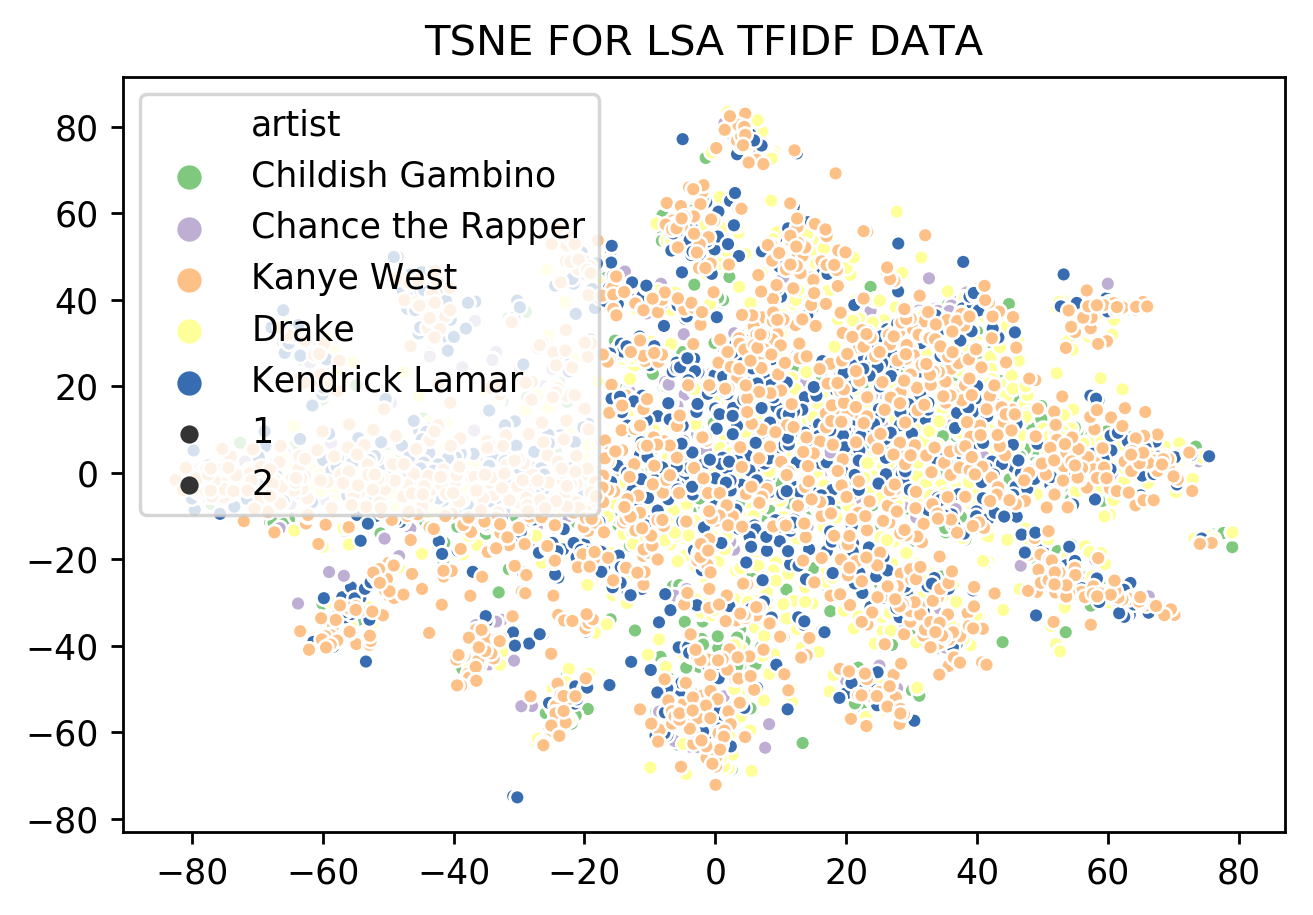

In [19]:
artists = df.artist
plt.figure(dpi=250)
plt.title("TSNE FOR LSA TFIDF DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], artists,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

In [20]:
artists.value_counts()

Kanye West           1933
Drake                1596
Kendrick Lamar       1483
Childish Gambino      824
Chance the Rapper     468
Name: artist, dtype: int64

In [21]:
# nmf_cv DIMENSIONALITY REDUCTION ON CV
# Make the other two

n_comp = 20
nmf_cv = NMF(n_components=n_comp)

nmf_cv_data = nmf_cv.fit_transform(cv_data)
rapper = model_df.rapper

display_topics(nmf_cv,count_vectorizer.get_feature_names(),15)


Topic  0
say, real, time, way, people, best, day, really, look, think, say say, clique, best best, things, said

Topic  1
ring, ring ring, hugh, buzzer, ring buzzer, buzzer hugh, hugh ring, hugh hugh, buzzer ring, chance, ring chance, chance ring, yo, thing, phone

Topic  2
love, love love, ove, ove love, lo, lo ove, love lo, say love, eyes, people, hurt, hate, love say, gave, ve seen

Topic  3
cam, cam cam, gotta, gotta cam, cam gotta, lotta gotta, cam lotta, lotta, god, kanye west, kanye, west, ft, damn, god damn

Topic  4
juke, juke juke, break, town, chi, chi town, town break, break chi, break break, juke break, break juke, gon, angel, day, live

Topic  5
man, black, black man, man let, man man, let man, man black, money black, man money, somebody, tell somebody, told, let, boy, tell

Topic  6
got, got got, inside, bom, dna, said, ve, bom bom, ass, inside dna, city, gon, game, kids, big

Topic  7
needed, needed needed, hate, yeezy, said, million, yeezy yeezy, minute, boy, work, mi

In [22]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=30).fit_transform(nmf_cv_data)
X_embedded.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.041s...
[t-SNE] Computed neighbors for 6304 samples in 1.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.600739
[t-SNE] Error after 1000 iterations: 1.170203


(6304, 2)

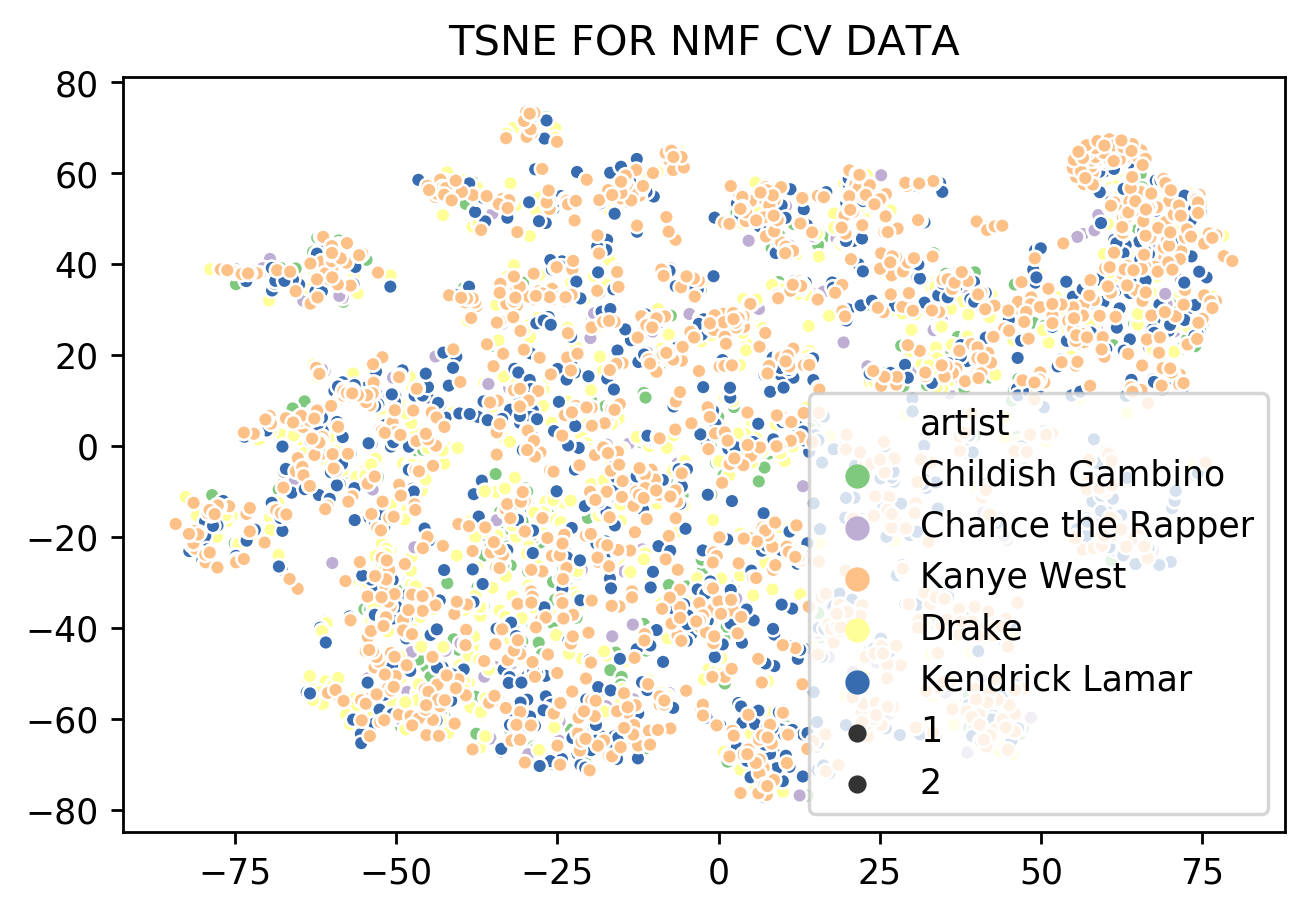

In [23]:
artists = df.artist
plt.figure(dpi=250)
plt.title("TSNE FOR NMF CV DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], artists,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

In [24]:
# lsa_cv DIMENSIONALITY REDUCTION ON CV

n_comp = 20
lsa_cv = TruncatedSVD(n_components=n_comp)

lsa_cv_data = lsa_cv.fit_transform(cv_data)

var_cv = lsa_cv.explained_variance_ratio_

var_cv1 = np.cumsum(np.round(lsa_cv.explained_variance_ratio_, decimals=4)*100)

display_topics(lsa_cv,count_vectorizer.get_feature_names(),15)


Topic  0
got, ain, love, man, cause, say, make, let, tell, time, ll, need, right, money, girl

Topic  1
ring, ring ring, hugh, buzzer, ring buzzer, buzzer hugh, hugh ring, hugh hugh, buzzer ring, chance, chance ring, ring chance, rings, yo, phone

Topic  2
love, love love, ove love, ove, love lo, lo ove, lo, say love, eyes, hurt, love say, gave love, ve seen, people love, love baby

Topic  3
cam, cam cam, gotta, gotta cam, cam gotta, love, lotta gotta, cam lotta, lotta, love love, ft, kanye west, god, kanye, west

Topic  4
juke, juke juke, break, town, chi, chi town, break chi, town break, break break, juke break, break juke, gon, angel, day, ll

Topic  5
man, let, man let, black, let man, man man, black man, man black, halloween, let halloween, money black, halloween let, money, let let, man money

Topic  6
got, man, let, man let, got got, money, bom, black man, black, let man, man man, bom bom, love love, dna, inside dna

Topic  7
needed, needed needed, got, man, hate, said, got got

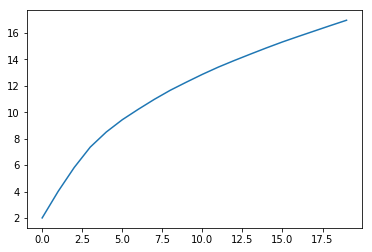

In [25]:
## FIGURE OUT HOW MANY COMPONENTS TO USE

plt.plot(var_cv1)

In [26]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lsa_cv_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.006s...
[t-SNE] Computed neighbors for 6304 samples in 1.309s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.820671
[t-SNE] Error after 1000 iterations: 1.259435


(6304, 2)

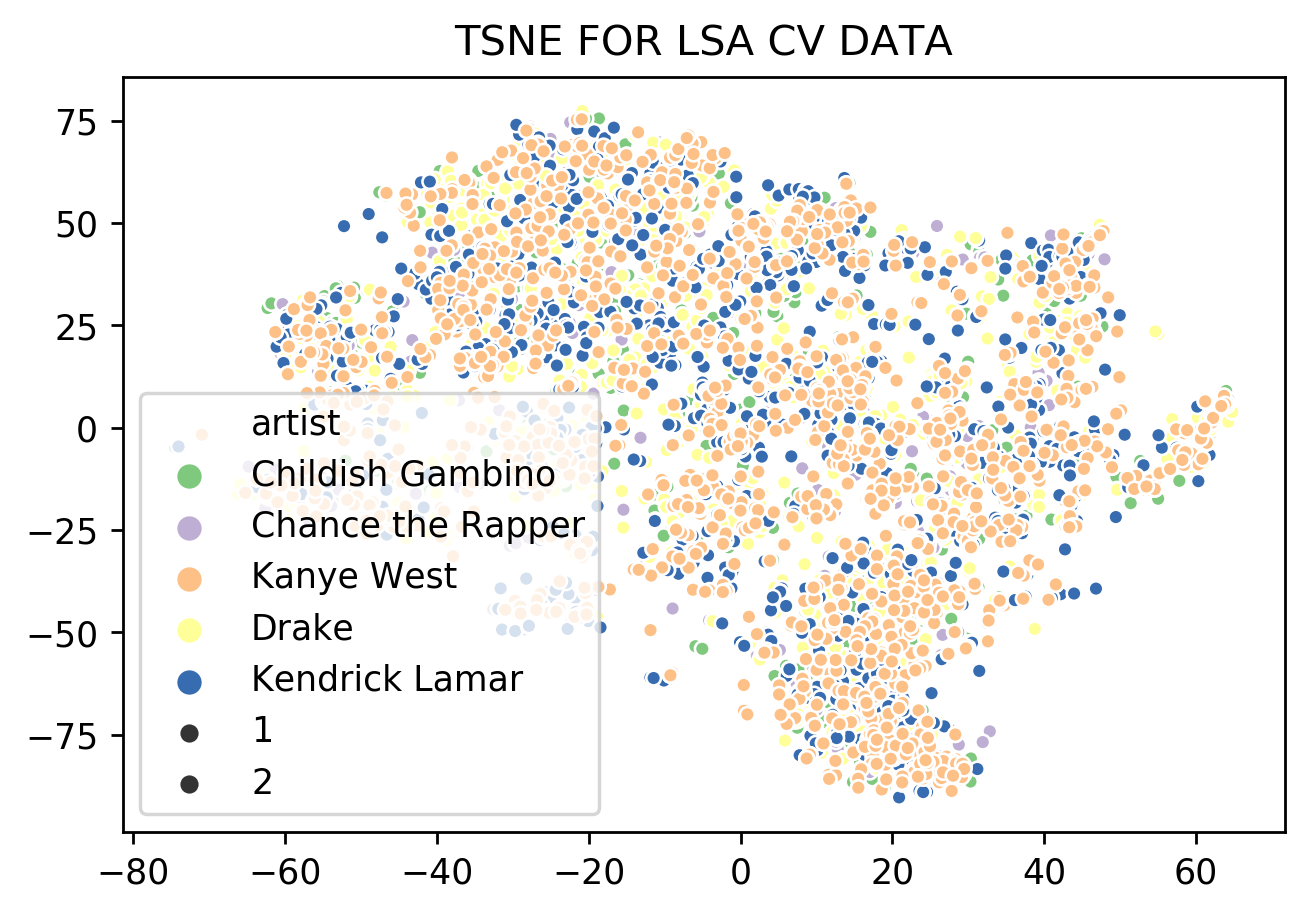

In [27]:
artists = df.artist
plt.figure(dpi=250)
plt.title("TSNE FOR LSA CV DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], artists,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

In [28]:
## LDA WITH TFIDF

n_comp = 10
lda_tfidf = LatentDirichletAllocation(n_components=n_comp)

lda_tfidf_data = lda_tfidf.fit_transform(tfidf_data)

var = lda_tfidf.explained_variance_ratio_

var1 = np.cumsum(np.round(lda_tfidf.explained_variance_ratio_, decimals=4)*100)

display_topics(lda_tfidf,tfidf_vectorizer.get_feature_names(),15)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)



Topic  0
turn turn, training, bu, mind tell, bir, clothing, training day, khaled, clothing line, black faces, looking looking, moaning, dj khaled, sparring, line saying

Topic  1
fu, nori, tell nori, hiiipower, hold tight, nori tell, tight hold, bum, fu fu, flooded, hiiipower hiiipower, kung fu, fu kenny, kung, projects flooded

Topic  2
dizzle, glitch, yeeehh, hi hater, meme, faaaaaaaa, bekle, bitch act, mean meme, bekle bekle, hater hi, scream meme, special special, act special, obama heaven

Topic  3
feel liberated, liberated, houstatlantavegas, aye aye, related, ahhh, liberated feel, houstatlantavegas houstatlantavegas, instigated tell, tell related, liberated instigated, shoulda known, snobbery, instigated, damn kanye

Topic  4
away southside, southside serenade, serenade, serenade went, humming, doo, handle, headphones, broke heart, doo doo, serenade south, bitch turn, superhero, inside feeling, handle handle

Topic  5
wee, wee wee, directed, cam cam, matter say, stop love, real

In [30]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lda_tfidf_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.006s...
[t-SNE] Computed neighbors for 6304 samples in 0.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.090435
[t-SNE] Error after 1000 iterations: 0.266640


(6304, 2)

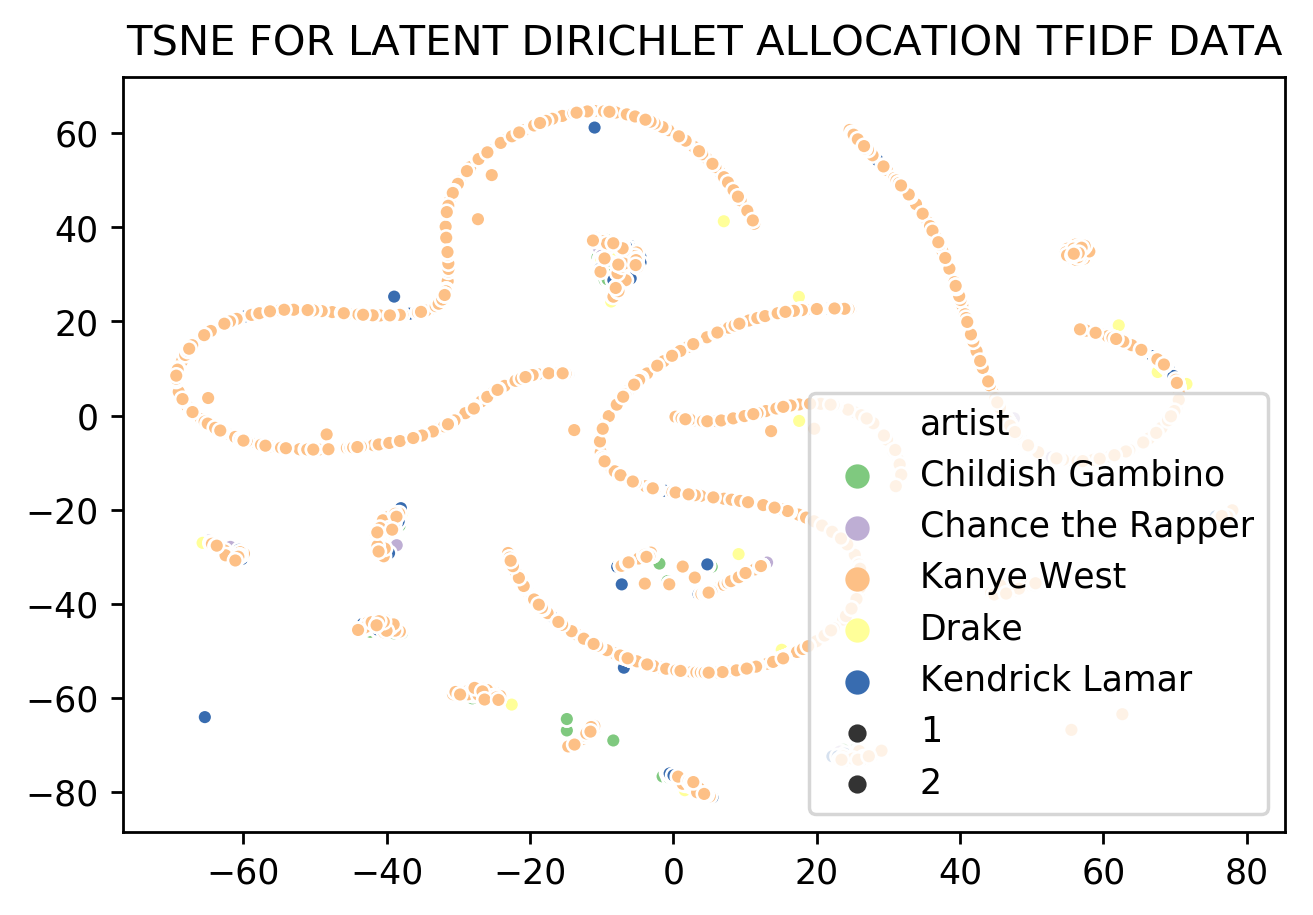

In [31]:
artists = df.artist
plt.figure(dpi=250)
plt.title("TSNE FOR LATENT DIRICHLET ALLOCATION TFIDF DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], artists,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

In [32]:
## LDA WITH CV

n_comp = 10
lda_cv = LatentDirichletAllocation(n_components=n_comp)

lda_cv_data = lda_cv.fit_transform(cv_data)

# var = lda_tfidf.explained_variance_ratio_

# var1 = np.cumsum(np.round(lda_tfidf.explained_variance_ratio_, decimals=4)*100)

display_topics(lda_cv,count_vectorizer.get_feature_names(),15)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)



Topic  0
needed, needed needed, hold, relax ll, ll whack, aye, friends friends, ll, whoop, fu, blah, gangstas, compton, weather, hoes hoes

Topic  1
black, black man, lucy, chain heavy, kendrick, heavy chain, teach, glow, touch sky, dna, serenade, compton, henny, southside serenade, away southside

Topic  2
good, feel, high, alright, way, ready, make, gon, won, jam, problem, make feel, brain, gon alright, bout

Topic  3
cam, cam cam, catch, explain, wee, bom, police, wee wee, level, woah, baby, smoke, igh, bom bom, bathroom

Topic  4
hol, hol hol, falls, pool, dive, pool liquor, lil, kendrick lamar, hiiipower, th, lamar, tat, yeezy, liquor dive, slave

Topic  5
ain, got, new, come, man, look, gotta, city, girl, loving, gonna, better, heard, work, night

Topic  6
kanye, real, lights, hate, started, west, money, team, dj, kanye west, girls, turn, video, rock, mo

Topic  7
god, better, let, kill vibe, vibe, bitch kill, rules, yeezy, god god, best best, vibe bitch, fall, outside, better b

In [33]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lda_cv_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6304 samples in 0.006s...
[t-SNE] Computed neighbors for 6304 samples in 0.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6304
[t-SNE] Computed conditional probabilities for sample 2000 / 6304
[t-SNE] Computed conditional probabilities for sample 3000 / 6304
[t-SNE] Computed conditional probabilities for sample 4000 / 6304
[t-SNE] Computed conditional probabilities for sample 5000 / 6304
[t-SNE] Computed conditional probabilities for sample 6000 / 6304
[t-SNE] Computed conditional probabilities for sample 6304 / 6304
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.616638
[t-SNE] Error after 1000 iterations: 0.446697


(6304, 2)

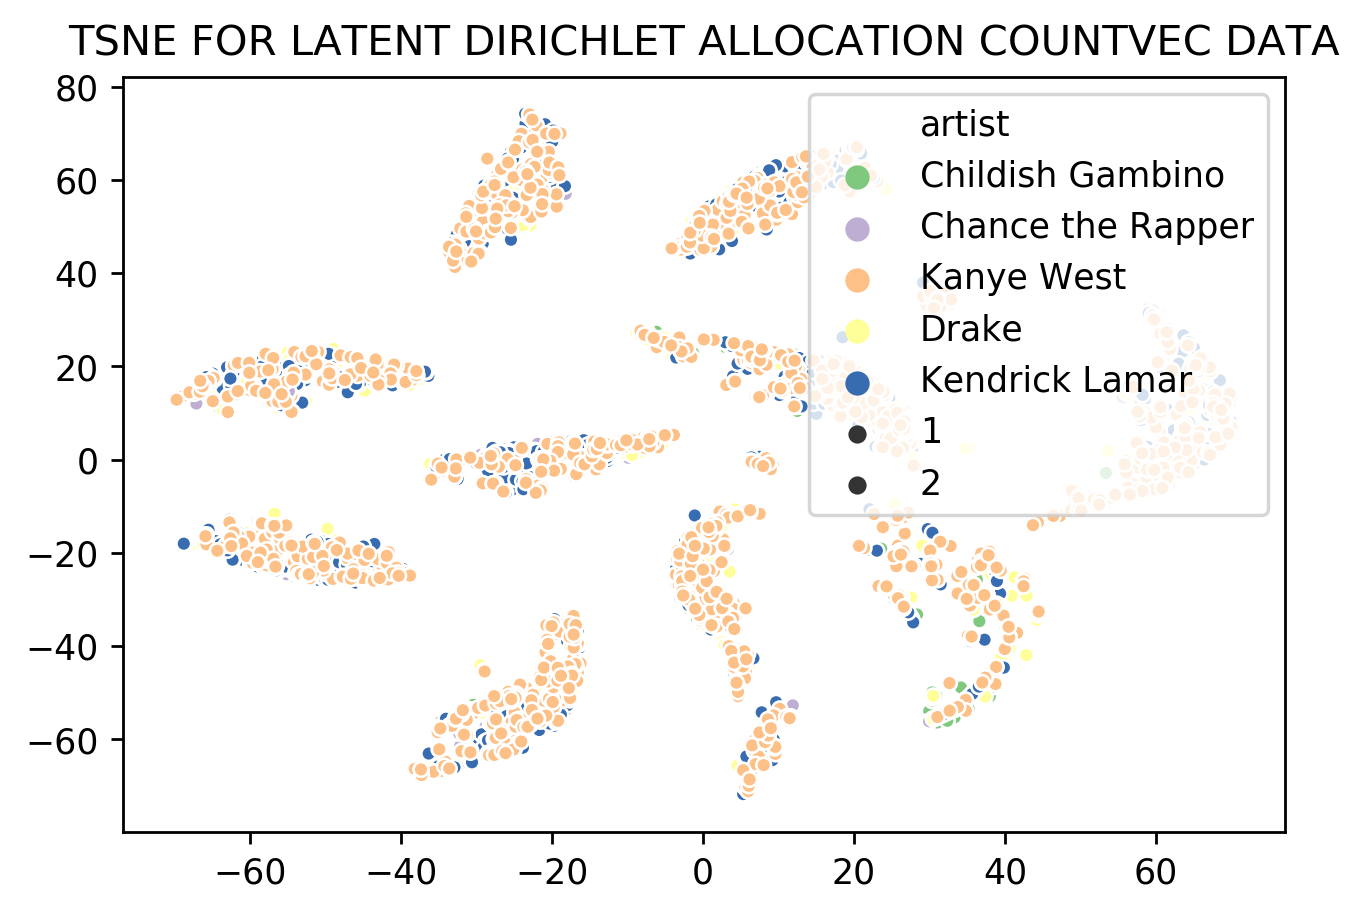

In [34]:
artists = df.artist
plt.figure(dpi=250)
plt.title("TSNE FOR LATENT DIRICHLET ALLOCATION COUNTVEC DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], artists,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

In [35]:
## PICKLE TRUNCATED SVD ON TFIDF_DATA SO YOU DON'T HAVE TO REFIT IT EACH TIME

# with open('models/lsa_tfidf.pkl', 'wb') as picklefile:
#     pickle.dump(lsa_tfidf, picklefile)